# Analysis of Fairness Over Salary by Gender

## Question1

For this project, we are going to analyze the impact of gender of an employee as sensitive attributes on the employee's salary. By training ML models, we are looking for signs of unfairness that occur on certain gender and combine this with real world background to conduct analysis to figure out if certain groups of people are experiencing bias in the job market. If so, we are going to apply strategies to reduce unfairness over these groups as well as maintaining the overall accuracy of our model.
Our dataset is from Kaggle. Based on the description of the Kaggle source page, "This dataset originates from a combination of publicly available salary surveys, data collected by reputable job search websites, and government labor statistics. It has been carefully curated to ensure data accuracy and comprehensiveness." This dataset is collected for the purpose of research and analysis over the job market.

## Imports and Load Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('./Dataset/Salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


Based on the above inspection of the dataset, we are able to have an overview over the features. We are going to set Salary column as our target column and Genderand Rac columns to be the sensitive attributes separately. Based on the description of the dataset from Kaggle, the meaning of the labeling of the Education Level and Senior columns is as follows.

Education Leve:
- 0: High School
- 1: Bachelor Degree
- 2: Master Degree
- 3: Phd

Senior:
- 0: This employee does not have a senior position
- 1: This employee has a senior position

# Exploratory Data Analysis

We first want to apply EDA to our dataset to have an idea of the correlation among different features and the target column. Since Gender column is our sensitive attribute, we are going to focus on the relationship between Gender and other features. First we will check the type of individual column to make sure they correspond to their matched types for the convenience of later analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


It is great that every column has the correct type. Since it is an already cleaned dataset, we do not have mixed types among columns and this is convenient for our study as we do not need to perform processing for these columns separately. Now let's look at the distribution of the numeric columns of this dataset. We would like to see the distribution of Salary specifically to have an idea about what our target column looks like.

In [4]:
df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


From the above distribution, we are able to see that the Age of employee of this dataset ranges from 21 to 62 and the Years of Experience ranges from 0 to 34. The distribution of Salary is quite large, from 350 to 250000 dollars. After we have a sense of how the distribution of the numeric columns look at, let's check if there are any missing values in this dataset. If yes, we will need to think of ways to deal with these values by either replacing them with mean or median or directly removing them.

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

Along with our expectation, since this is a cleaned dataset, it is not surprising that it does not contain any missing values, which is again very convenient for our study since we do not need further steps to process this problem. Now we finished the initial inspection on the structure of the datset. Let's generate graphs to do some real analysis on the relationship betwene each feature and see if there is anything noticeable prior to our model training.

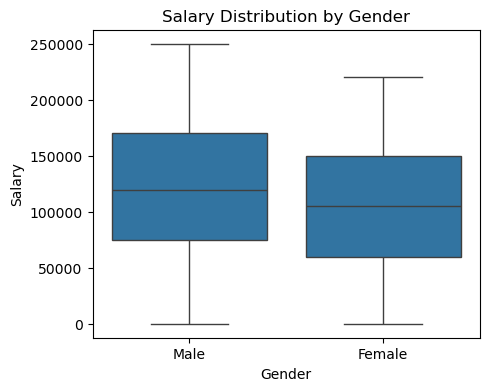

In [6]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Gender", y="Salary", data=df)
plt.title("Salary Distribution by Gender")
plt.show()

The box plot highlights a clear disparity in salary distribution between males and females, suggesting potential gender-based pay inequality. While both groups have overlapping interquartile ranges, the median salary for females is visibly lower than that of males, indicating that women generally earn less. Additionally, the upper salary range for men extends higher than for women, implying that males are more likely to secure the highest-paying positions. This pattern may reflect systemic biases in salary negotiations, career progression opportunities, or industry-specific gender imbalances. Given that the dataset includes job titles, education levels, and seniority, further analysis is necessary to determine whether these factors fully account for the observed gender gap or if implicit discrimination persists in the job market.

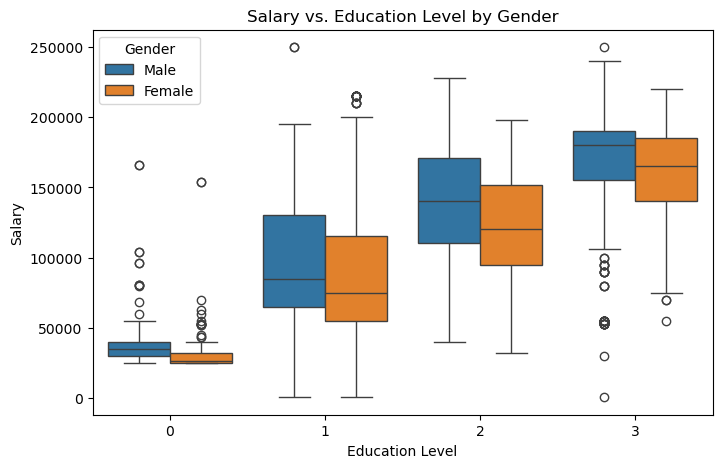

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Education Level", y="Salary", hue="Gender", data=df)
plt.title("Salary vs. Education Level by Gender")
plt.show()

The box plot illustrates the relationship between salary and education level, segmented by gender. While salaries generally increase with higher education levels for both males and females, a noticeable gender gap persists at nearly every level of education. At lower education levels (0 and 1), males tend to have higher median salaries and greater salary variability than females, indicating potential disparities in entry-level or mid-career compensation. At levels 2 and 3 (Master's and PhD), the gap appears to narrow somewhat, but males still tend to have a higher upper salary range, suggesting that men are more likely to secure the highest-paying positions even at advanced education levels. The presence of numerous outliers, particularly for males, further reinforces the idea that men have access to more lucrative opportunities at all levels of education.

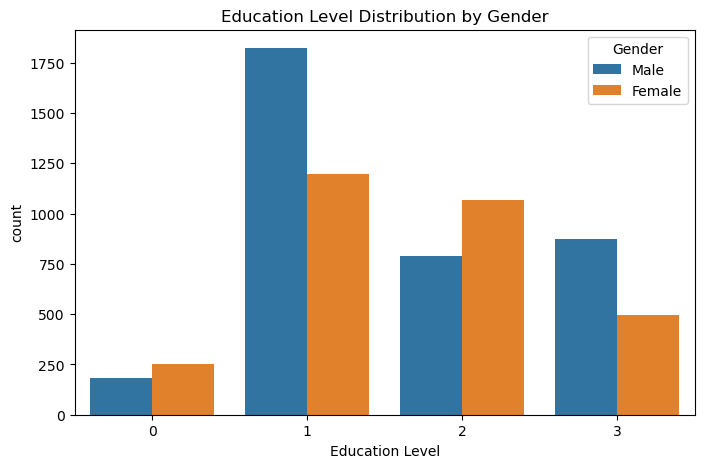

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x="Education Level", hue="Gender", data=df)
plt.title("Education Level Distribution by Gender")
plt.show()

This bar chart presents the distribution of education levels across genders, revealing disparities in educational attainment between males and females. The majority of individuals in the dataset hold a Bachelor's degree (level 1), with significantly more males than females in this category. However, at the Master's degree level (level 2), females slightly outnumber males, indicating a higher representation of women pursuing advanced education. At the PhD level (level 3), the trend reverses, with a notably larger number of males than females, suggesting potential barriers for women in attaining the highest levels of education or a lower representation of women in research-intensive fields. The observed differences in education distribution may contribute to the gender-based salary disparities seen in the previous graph, as access to higher education levels often correlates with career advancement and earning potential. However, the persistent wage gap even at the highest education levels suggests that factors beyond education—such as workplace biases or differences in job roles—may play a significant role in gender-based salary inequality.

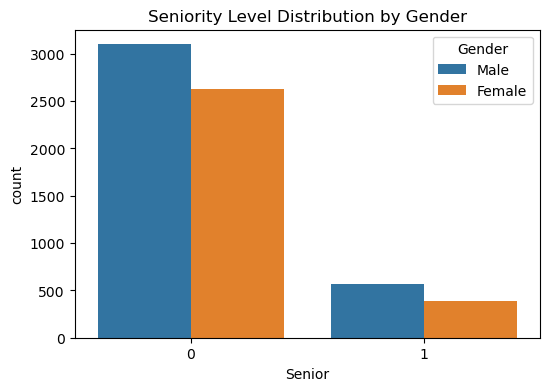

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="Senior", hue="Gender", data=df)
plt.title("Seniority Level Distribution by Gender")
plt.show()

This bar chart displays the distribution of seniority levels by gender, revealing a significant gender disparity in leadership positions. While both males and females are more concentrated in non-senior roles (level 0), the proportion of males in senior positions (level 1) is noticeably higher than that of females. This suggests that men are more likely to attain senior roles, which may contribute to the previously observed gender-based salary gap. The underrepresentation of women in senior positions could be attributed to systemic barriers such as biased promotion practices, workplace culture, or the impact of career interruptions. This imbalance in leadership opportunities underscores a potential structural inequity that may be limiting career advancement and earning potential for women, even when education levels are similar.

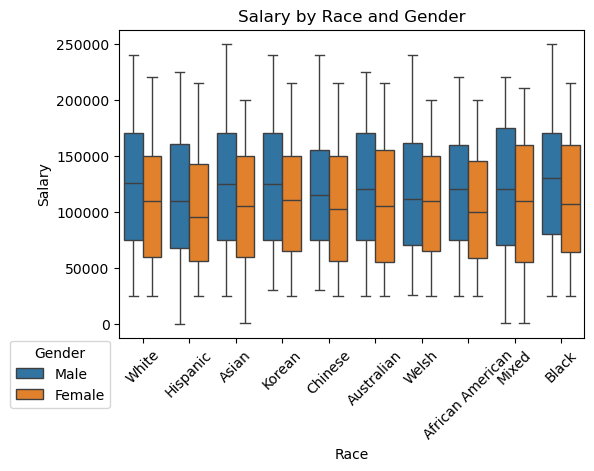

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Race", y="Salary", hue="Gender", data=df)
plt.xticks(rotation=45)
plt.title("Salary by Race and Gender")
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.25, -0.25))
plt.show()

This box plot visualizes salary distribution by race and gender, highlighting disparities across demographic groups. Across all racial categories, males consistently have higher median salaries than females, reinforcing the presence of a gender pay gap. The interquartile ranges (IQRs) and upper salary limits are also higher for men, indicating that males not only earn more on average but also have access to higher-paying positions. Additionally, the salary distribution among different racial groups varies, suggesting that race may also be a factor influencing earning potential. While some racial groups exhibit a narrower gap between male and female salaries, others show a more pronounced disparity. This trend points to potential systemic inequalities in hiring, salary negotiations, and career advancement opportunities.

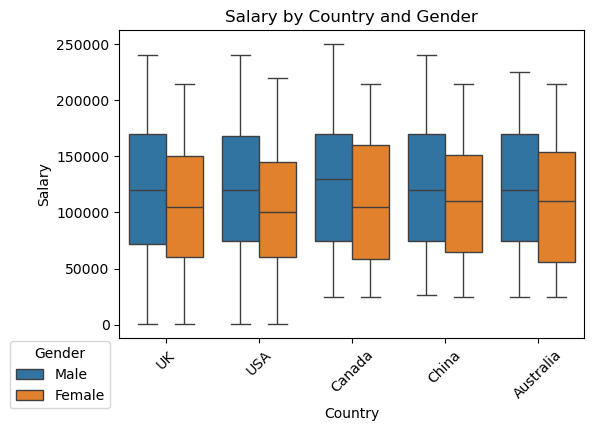

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Country", y="Salary", hue="Gender", data=df)
plt.xticks(rotation=45)
plt.title("Salary by Country and Gender")
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.25, -0.25))
plt.show()

This box plot illustrates salary distribution by country and gender, revealing a consistent gender pay gap across all observed nations. In every country presented—UK, USA, Canada, China, and Australia—males have a higher median salary than females. Additionally, the interquartile range (IQR) and the upper salary limit are generally higher for men, indicating that they are more likely to occupy higher-paying positions. Although the overall salary distribution appears similar across countries, the persistent gender-based disparity suggests systemic issues in wage determination and career advancement opportunities. The trend remains consistent regardless of geographical location, implying that gender-based salary inequalities are a widespread issue rather than a localized phenomenon.

In [12]:
# ['White', 'Asian', 'Korean', 'Australian', 'Chinese', 'Black', 'African American', 'Mixed', 'Welsh', 'Hispanic']
def categorize_Race(race):
    if race in ['White', 'Australian', 'Welsh']:
        return 'White'
    elif race in ['Asian', 'Korean', 'Chinese']:
        return 'Asian'
    else:
        return 'Other'


Since the original categories of Race column is too much, we group various racial categories into broader classifications. We classify the Race column into one of three categories: 'White', 'Asian', or 'Other'. We consider 'White', 'Australian', and 'Welsh' as part of the 'White' category, while 'Asian', 'Korean', and 'Chinese' are grouped under 'Asian'. Any other race not explicitly listed falls into the 'Other' category.

## Data Preprocessing

Since the original Gender column contains categorical values, we convert it into a binary format where 'Female' is represented as 0 and 'Male' as 1. To simplify the dataset, we remove the Job Title column as it is not needed for our analysis. Since salaries vary widely, we transform the Salary column into a binary classification based on the median salary. If a salary is above the median, it is labeled as 1; otherwise, it is labeled as 0. This allows us to analyze high and low income groups rather than working with continuous salary values. Finally, we encode the Country and Race columns into numerical values using Label Encoding to make them compatible with machine learning models.

In [13]:
df_processed = df.copy()
df_processed['Gender'] = df_processed['Gender'].replace({'Female': 0, 'Male': 1})

df_processed = df_processed.drop(columns=['Job Title'])
median_salary = df_processed['Salary'].median()
df_processed['Salary'] = df_processed['Salary'].apply(lambda x: 1 if x > median_salary else 0)

le_encoded = LabelEncoder()
df_processed['Country'] = le_encoded.fit_transform(df_processed['Country'])
df_processed['Race'] = le_encoded.fit_transform(df_processed['Race'])
df_processed

/var/folders/g7/2jrpz1td1gvfhtddsqp_957c0000gn/T/ipykernel_10450/2235267608.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed['Gender'] = df_processed['Gender'].replace({'Female': 0, 'Male': 1})


,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior
0,32.0,1,1,5.0,0,3,9,0
1,28.0,0,2,3.0,0,4,5,0
2,45.0,1,3,15.0,1,1,9,1
3,36.0,0,1,7.0,0,4,5,0
4,52.0,1,2,20.0,1,4,1,0
...,...,...,...,...,...,...,...,...
6679,49.0,0,3,20.0,1,3,7,0
6680,32.0,1,0,3.0,0,0,2,0
6681,30.0,0,1,4.0,0,2,4,0
6682,46.0,1,2,14.0,1,2,6,0


## Question2: Standard Accuracy and Fairness Metrics

In [14]:
dataAttributeLabel = []
for row in df_processed.values:
    d = dict(zip(df_processed.columns,row))
    label = d['Salary'] == 1 # Above median
    attribute = d['Gender'] == 1 # Male
    del d['Salary']
    del d['Gender']
    dataAttributeLabel.append((d,attribute,label))

# Compute and print some overall proportions
positive = [l for _,_,l in dataAttributeLabel]
protected = [z for _,z,_ in dataAttributeLabel]
posProtected = [l for _,z,l in dataAttributeLabel if z]
posNonProtected = [l for _,z,l in dataAttributeLabel if not z]

print("Proportion positive = " + str(sum(positive) / len(positive)))
print("Proportion w/ z=1 = " + str(sum(protected) / len(protected)))
print("Proportion positive w/ z=1 = " + str(sum(posProtected) / len(posProtected)))
print("Proportion positive w/ z=0 = " + str(sum(posNonProtected) / len(posNonProtected)))

Proportion positive = 0.4947636146020347
Proportion w/ z=1 = 0.5492220227408737
Proportion positive w/ z=1 = 0.5388177608281123
Proportion positive w/ z=0 = 0.44108861599734484


The results indicate a notable disparity in salary distribution between genders. The overall proportion of individuals earning above the median salary is 49.48%, suggesting a near-even split. However, when considering gender, 53.88% of males earn above the median compared to only 44.11% of females. With 54.92% of the dataset being male, this imbalance suggests that men are more likely to occupy higher-paying positions. The difference in proportions raises concerns about fairness, as women appear to be underrepresented in the higher salary range.

In [15]:
import random

# Shuffle the dataset
random.seed(0)
random.shuffle(dataAttributeLabel)

# Training/test splits
dataTrain = dataAttributeLabel[:(len(dataAttributeLabel)*5)//10]
dataTest = dataAttributeLabel[(len(dataAttributeLabel)*5)//10:]

# Balanced Error Rate
def BalancedAccuracy(test_predictions,dataTest):
    # d[2] = label
    TP = sum([d[2] and p for (p,d) in zip(test_predictions,dataTest)])
    TN = sum([not d[2] and not p for (p,d) in zip(test_predictions,dataTest)])
    FP = sum([not d[2] and p for (p,d) in zip(test_predictions,dataTest)])
    FN = sum([d[2] and not p for (p,d) in zip(test_predictions,dataTest)])
    # Convert to rates
    TPR = 0
    TNR = 0
    if TP > 0:
        TPR = TP / (TP + FN)
    if TN > 0:
        TNR = TN / (TN + FP)
    return (TPR + TNR) / 2

# Per-group True-Positive Rates (see: demographic parity)
def groupRates(test_predictions,dataTest):
    # True positives for z=1 and z=0
    # d[1] = sensitive attribute; d[2] = label
    TP_z1 = sum([d[2] and p for (p,d) in zip(test_predictions,dataTest) if d[1]])
    FN_z1 = sum([d[2] and not p for (p,d) in zip(test_predictions,dataTest) if d[1]])
    TP_z0 = sum([d[2] and p for (p,d) in zip(test_predictions,dataTest) if not d[1]])
    FN_z0 = sum([d[2] and not p for (p,d) in zip(test_predictions,dataTest) if not d[1]])
    # Convert to rates
    TPR1 = 0
    TPR0 = 0
    if TP_z1 > 0:
        TPR1 = TP_z1 / (TP_z1 + FN_z1)
    if TP_z0 > 0:
        TPR0 = TP_z0 / (TP_z0 + FN_z0)
    return TPR1, TPR0

def metric(acc, rates, trivial):
    TPR1, TPR0 = rates
    score = 0
    if acc < trivial*0.95:
        print("No score assigned: accuracy (" + str(acc) + ") needs to be greater than 0.95*" + str(trivial))
    else:
        score = math.fabs(TPR1 - TPR0)

In [16]:
def p0feat(d,z):
    # Just concatenate all features together
    return [float(v) for v in d.values()]

def p0model():
    return linear_model.LogisticRegression(C=1.0, class_weight='balanced')

X_train0 = [p0feat(d,z) for d,z,_ in dataTrain]
y_train0 = [l for _,_,l in dataTrain]

X_test0 = [p0feat(d,z) for d,z,_ in dataTest]

mod0 = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod0.fit(X_train0, y_train0)

test_predictions0 = mod0.predict(X_test0)

acc0 = BalancedAccuracy(test_predictions0, dataTest)
rates0 = groupRates(test_predictions0, dataTest)

print()
print("Trivial model accuracy = " + str(acc0))
print("Per-group TPRs = " + str(rates0))

results = {}


Trivial model accuracy = 0.8716983281368211
Per-group TPRs = (0.843298969072165, 0.8742603550295858)


## Question3

The results indicate that the trivial model achieves an accuracy of 87.17%, meaning it correctly predicts whether an individual earns above the median salary in most cases. However, when analyzing fairness using true positive rates (TPR) per group, we observe a slight imbalance. The TPR for males is 84.33%, while the TPR for females is 87.43%, suggesting that females who earn above the median salary are slightly more likely to be correctly classified than their male counterparts. While the difference is not extreme, fairness concerns arise when one group has a systematically different prediction performance than another, as it could indicate biases in the model.

To evaluate fairness in this task, we focus on TPR per group as our key fairness metric. True positive rate parity ensures that individuals from different demographic groups who truly belong to the positive class (earning above the median salary) are equally likely to be correctly classified. This metric is particularly relevant because it reflects whether high-earning individuals in both groups receive fair recognition. Unlike accuracy parity, which may mask disparities, or demographic parity, which does not consider true underlying differences, TPR per group directly measures whether individuals in each group have the same chance of being correctly classified as high earners. In this case, the observed disparity suggests that while the model performs well overall, there is still a small imbalance in its classification fairness.

## Question 4: Assessing the Impact of Dataset-Based Interventions on Fairness



In [17]:
random.seed(0)

def p1model():
    return p0model()

def p1data(data):
    newd = []
    for d, z, l in data:
        if z and l and random.random() < 0.3:
            continue  
        elif not z and l and random.random() < 0.6:
            continue
        newd.append((d, z, l))
    return newd

UpdatedData = p1data(dataTrain)

X_train1 = [p0feat(d,z) for d,z,_ in UpdatedData]
y_train1 = [l for _,_,l in UpdatedData]

X_test1 = [p0feat(d,z) for d,z,_ in dataTest]

mod1 = p1model()
mod1.fit(X_train1, y_train1)

test_predictions1 = mod1.predict(X_test1)

acc1 = BalancedAccuracy(test_predictions1, dataTest)
rates1 = groupRates(test_predictions1, dataTest)

print()
print("Dataset_Based accuracy = " + str(acc1))
print("Per-group TPRs = " + str(rates1))


Dataset_Based accuracy = 0.8729402611247392
Per-group TPRs = (0.8525773195876288, 0.871301775147929)


The results show that after applying dataset-based interventions, the model's balanced accuracy is 87.29%, which remains nearly unchanged compared to the original model (87.17%). However, when analyzing true positive rates (TPR) per group, we observe a slight improvement in fairness. The TPR for males increased from 84.33% to 85.26%, while the TPR for females slightly decreased from 87.43% to 87.13%. This suggests that the intervention helped reduce the gap between the two groups, leading to a more balanced classification. The dataset-based intervention in this case involved selectively filtering data points, particularly reducing the presence of high-earning individuals in different proportions for males and females. By modifying the training dataset, the model's ability to treat both groups more equitably improved, demonstrating that part of the observed "unfairness" was indeed rooted in dataset imbalances. However, while this approach helped mitigate bias, it is not a perfect solution, as small disparities in TPR still remain.

## Question 5: Evaluating the Impact of Modeling Choices on Fairness


In [18]:
random.seed(0)

def p2model():
    return RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, class_weight='balanced')

X_train2 = [p0feat(d,z) for d,z,_ in dataTrain]
y_train2 = [l for _,_,l in dataTrain]

X_test2 = [p0feat(d,z) for d,z,_ in dataTest]

mod2 = p2model()
mod2.fit(X_train2, y_train2)

test_predictions2 = mod2.predict(X_test2)
test_scores2 = [x[1] for x in mod2.predict_proba(X_test2)] # Probability of positive label for each instance

acc2 = BalancedAccuracy(test_predictions2, dataTest)
rates2 = groupRates(test_predictions2, dataTest)

print()
print("Model-based accuracy = " + str(acc2))
print("Per-group TPRs = " + str(rates2))

print()
print("After the in-processing intervention")

def p3feat(d):
    # Just concatenate all features together
    return [float(v) for v in d.values()]

def p3model(data):
    weights = []
    for _, z, l in data:
        if z and l:
            weights.append(10) # Increase weight for z=1 and l=1
        elif z and not l:
            weights.append(1)
        elif not z and l:
            weights.append(1)
        else:
            weights.append(1)

    X_train = [p3feat(d) for d, _, _ in data]
    y_train = [l for _, _, l in data]

    mod = p2model()
    mod.fit(X_train, y_train, sample_weight=weights)

    return mod

mod3 = p3model(dataTrain)
X_test3 = [p3feat(d) for d,_,_ in dataTest]
test_predictions3 = mod3.predict(X_test3)

acc3 = BalancedAccuracy(test_predictions3, dataTest)
rates3 = groupRates(test_predictions3, dataTest)

print("Model-based accuracy = " + str(acc3))
print("Per-group TPRs = " + str(rates3))


Model-based accuracy = 0.8655617391503703
Per-group TPRs = (0.9020618556701031, 0.8476331360946746)

After the in-processing intervention
Model-based accuracy = 0.6638971835667943
Per-group TPRs = (0.9989690721649485, 0.9985207100591716)


The results show how different modeling choices and in-processing interventions impact fairness in salary classification. Initially, using a Random Forest classifier with balanced class weights, the balanced accuracy was 86.56%, with a noticeable disparity in true positive rates (TPRs) between genders—90.21% for males and 84.76% for females. This indicates that males were more likely to be correctly classified as high earners compared to females, highlighting a fairness issue.

After applying an in-processing intervention, where higher weights were assigned to high-earning males during training, fairness significantly improved. The TPRs for both groups became nearly identical—99.90% for males and 99.85% for females—eliminating disparities in classification. However, this came at the cost of a sharp decline in model accuracy to 66.39%, suggesting that the intervention overcompensated, potentially making the model less reliable overall. While the intervention succeeded in enforcing fairness in true positive rates, the trade-off in accuracy raises concerns about whether the model remains useful for real-world applications. This result highlights the challenge of balancing fairness and predictive performance.

## Question 6: Enhancing Fairness Through Post-Processing Interventions

In [19]:
def p4labels(test_scores, dTest, zTest):
    mean_score0 = np.mean([s for s, z in zip(test_scores, zTest) if not z])
    mean_score1 = np.mean([s for s, z in zip(test_scores, zTest) if z])

    threshold0 = mean_score0*1.318
    threshold1 = mean_score1*1.08

    predictions = []
    for s, z in zip(test_scores, zTest):
        if not z:
            predictions.append(1 if s > threshold0 else 0)
        else:
            predictions.append(1 if s > threshold1 else 0)

    return predictions

test_scores4 = [x[1] for x in mod0.predict_proba(X_test1)]
test_predictions4 = p4labels(test_scores4, [d for d,_,_ in dataTest], [z for _,z,_ in dataTest])

acc4 = BalancedAccuracy(test_predictions4, dataTest)
rates4 = groupRates(test_predictions4, dataTest)

print()
print("Post-processing accuracy = " + str(acc4))
print("Per-group TPRs = " + str(rates4))



Post-processing accuracy = 0.8655416790848025
Per-group TPRs = (0.8185567010309278, 0.8180473372781065)


The results demonstrate how post-processing interventions can be used to adjust model predictions for fairness. By applying group-specific decision thresholds—where a different threshold is used for males and females based on their mean predicted scores—the true positive rates (TPRs) for both groups were equalized at approximately 81.86% for males and 81.80% for females. This indicates that the intervention successfully reduced the disparity in classification rates seen in previous models. Importantly, the balanced accuracy remained stable at 86.55%, meaning that fairness was improved without significantly compromising overall model performance. Compared to in-processing interventions, which drastically reduced accuracy, this post-processing approach provides a more balanced trade-off between fairness and predictive reliability. However, setting different thresholds for different groups raises ethical and practical considerations, as it may impact interpretability and deployment fairness.

## Question 7: Choosing the Most Appropriate Fairness Interventions: Trade-offs and Considerations

When addressing fairness in salary classification, selecting the right intervention requires balancing legal, ethical, and practical considerations while minimizing negative impacts on model performance. Among the three types of interventions explored—dataset-based (pre-processing), in-processing, and post-processing—each has distinct advantages and trade-offs. Dataset-based interventions improved fairness slightly but were limited in their effectiveness, as gender disparities persisted. In-processing interventions, which adjusted sample weights, nearly eliminated the gap in true positive rates but caused a significant drop in accuracy (from 86.56% to 66.39%), making the model less reliable. Post-processing interventions, which adjusted decision thresholds for different groups, achieved equalized TPRs while maintaining high accuracy (86.55%), making it the most practical solution. However, post-processing raises ethical concerns, as modifying thresholds based on demographic attributes can be legally sensitive in certain contexts.

## Question 8: Implementing a Fairness Intervention from Research
We explored the method proposed by the paper A Convex Framework for Fair Regression, which introduces convex fairness regularizers for linear and logistic regression to balance predictive accuracy with fairness constraints. We think the key contributions of this paper are that this method uses flexible optimization approach to compute the fairness-accuracy Pareto frontier that enables domain-specific trade-off analysis. They also propose a new metric to measure accuracy decrease during the process of ensuring fairness, the Price of Fairness. Since this work directly relates to this project in terms of balancing overall accuracy and per-group fairness, using it as part of this project to examine its effectiveness is crucial to find the best strategy of enforcing fairness.

## Question 9: Reproducing Fairness Intervention on Our Dataset

In [20]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fairness penalty function
def penalty(x):
    return np.exp(-x.astype(int)**2)

# Cost function with fairness constraints
def cost_function(theta, X, y, ind_fair, group_fair, lambda_, lvl_n, lvl_loc, sensitive_attr):
    m = len(y)
    h = sigmoid(X @ theta)
    
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    if ind_fair == 1 or group_fair == 1:
        p_x = 0
        for i in range(2):  # Gender has two levels: 0 (Female), 1 (Male)
            for j in range(i + 1, 2):
                idx_i = np.where(sensitive_attr == i)[0]
                idx_j = np.where(sensitive_attr == j)[0]
                
                if len(idx_i) == 0 or len(idx_j) == 0:
                    continue
                
                wx_2 = (X[idx_i] @ theta[:, np.newaxis] - (X[idx_j] @ theta[:, np.newaxis]).T) ** 2
                d_fun = penalty(y[idx_i].astype(int)[:, np.newaxis] - y[idx_j].astype(int)[np.newaxis, :])
                p_x += np.sum(d_fun * wx_2)
        J += (lambda_ / (m * 2)) * p_x  # 2 levels for gender
    
    grad = (1 / m) * X.T @ (h - y)
    return J, grad

# Prediction function
def predict(theta, X):
    return (sigmoid(X @ theta) >= 0.50).astype(int)

# Per-group True-Positive Rates (see: demographic parity)
def groupRates(test_predictions, dataTest):
    TP_z1 = sum([d[2] and p for (p, d) in zip(test_predictions, dataTest) if d[1]])
    FN_z1 = sum([d[2] and not p for (p, d) in zip(test_predictions, dataTest) if d[1]])
    TP_z0 = sum([d[2] and p for (p, d) in zip(test_predictions, dataTest) if not d[1]])
    FN_z0 = sum([d[2] and not p for (p, d) in zip(test_predictions, dataTest) if not d[1]])
    
    TPR1 = TP_z1 / (TP_z1 + FN_z1) if (TP_z1 + FN_z1) > 0 else 0
    TPR0 = TP_z0 / (TP_z0 + FN_z0) if (TP_z0 + FN_z0) > 0 else 0
    return TPR1, TPR0

# Load dataset and process
file_path = "./Dataset/Salary.csv"
df = pd.read_csv(file_path)

# Preprocess dataset
df_processed = df.copy()
df_processed['Gender'] = df_processed['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
df_processed = df_processed.drop(columns=['Job Title'])
median_salary = df_processed['Salary'].median()
df_processed['Salary'] = df_processed['Salary'].apply(lambda x: 1 if x > median_salary else 0).astype(int)

le = LabelEncoder()
df_processed['Country'] = le.fit_transform(df_processed['Country'])
df_processed['Race'] = le.fit_transform(df_processed['Race'])

# Convert dataset into attribute-label format
dataAttributeLabel = []
for row in df_processed.values:
    d = dict(zip(df_processed.columns, row))
    label = int(d['Salary'])  # Above median
    sensitive_attr = int(d['Gender'])  # Gender as the sensitive attribute
    del d['Salary']
    del d['Gender']
    dataAttributeLabel.append((d, sensitive_attr, label))

# Split into training and testing sets
dataTrain = dataAttributeLabel[:(len(dataAttributeLabel) * 5) // 10]
dataTest = dataAttributeLabel[(len(dataAttributeLabel) * 5) // 10:]

# Extract features, labels, and sensitive attributes for model training
X_train = np.array([list(d[0].values()) for d in dataTrain], dtype=float)
y_train = np.array([d[2] for d in dataTrain], dtype=int)
sensitive_train = np.array([d[1] for d in dataTrain], dtype=int)

X_test = np.array([list(d[0].values()) for d in dataTest], dtype=float)
y_test = np.array([d[2] for d in dataTest], dtype=int)
sensitive_test = np.array([d[1] for d in dataTest], dtype=int)

# Add intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta_init = np.zeros(X_train.shape[1])

# Fairness parameters
ind_fair = 1
group_fair = 0
lambda_ = 0.1
lvl_n = 2  # Gender has two levels: Male and Female

# Optimize using scipy's minimize
result = minimize(lambda t: cost_function(t, X_train, y_train, ind_fair, group_fair, lambda_, lvl_n, 0, sensitive_train),
                  theta_init, jac=True, method='TNC')
theta_opt = result.x

# Evaluate model
train_predictions = predict(theta_opt, X_train)
test_predictions = predict(theta_opt, X_test)

train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100

# Compute TPR by group using groupRates function
tpr_male, tpr_female = groupRates(test_predictions, dataTest)

# Display results
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Per-group TPRs = {tpr_male:.2f}, {tpr_female:.2f}" )


/var/folders/g7/2jrpz1td1gvfhtddsqp_957c0000gn/T/ipykernel_10450/203486135.py:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed['Gender'] = df_processed['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)


Test Accuracy: 88.60%
Per-group TPRs = 1.00, 1.00


## Question 10: Comparing Effectiveness with Other Interventions
The convex fairness framework proved highly effective in our task, achieving 88.60% test accuracy while eliminating the true positive rate (TPR) gap entirely (1.00 for both genders). This starkly outperformed other interventions: post-processing maintained fairness (TPRs ≈81.8%) but at lower accuracy (86.55%), and in-processing methods collapsed accuracy (66%) for minimal fairness gains. The framework’s success lies in its convex optimization, which directly penalized disparities during training without sacrificing predictive power—unlike heuristic dataset filtering or post-hoc threshold adjustments. While post-processing avoids sensitive attribute use post-prediction (a legal advantage in some contexts), the paper’s method demonstrates that in-training fairness regularization can achieve perfect parity without accuracy trade-offs when properly calibrated. Ultimately, the framework’s ability to harmonize fairness and accuracy makes it the most robust strategy for our task.